<a href="https://colab.research.google.com/github/A-Abra/Semantic-segmentation/blob/milestone-4/Satellite_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install nni # install nni
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip # download ngrok and unzip it
! unzip ngrok-stable-linux-amd64.zip
! mkdir -p nni_repo
! git clone https://github.com/microsoft/nni.git nni_repo/nni # clone NNI's offical repo to get examples

! ./ngrok authtoken 2GjVnxjnDv5z3VXi5gMnrdVrbt1_2QJn9uCqErV2GtjMzb51v
! ./ngrok authtoken 2GmXbo1RU70RG8uDduyxjPyubu7_2wXQjd73hQierhViGJZXN

! nnictl create --config nni_repo/nni/examples/trials/mnist-pytorch/config.yml --port 5000 &
get_ipython().system_raw('./ngrok http 5000 &')

! curl -s http://localhost:4040/api/tunnels 

!mkdir satSegFiles
!cd /content/satSegFiles && wget https://raw.githubusercontent.com/bnsreenu/python_for_microscopists/master/228_semantic_segmentation_of_aerial_imagery_using_unet/228_training_aerial_imagery.py
!cd /content/satSegFiles && wget https://raw.githubusercontent.com/bnsreenu/python_for_microscopists/master/228_semantic_segmentation_of_aerial_imagery_using_unet/simple_multi_unet_model.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-12-05 02:02:36--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.161.241.46, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  3.02MB/s    in 7.5s    

2022-12-05 02:02:44 (1.75 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: fatal: destination path 'nni_repo/nni' already exists and is not an empty directory.
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
Traceback (most 

In [ ]:
!pip install -q kaggle
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
import gzip

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!echo '{"username":"anoshabraham","key":"e2a198b880ec737b10423cf5d0b23936"}' > ~/.kaggle/kaggle.json
!kaggle datasets download -d humansintheloop/semantic-segmentation-of-aerial-imagery

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           4875        154  1.0              
mvieira101/global-cost-of-living                                Global Cost of Living                                 1MB  2022-12-03 16:37:53            719         36  0.9705882        
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-

In [ ]:
!unzip semantic-segmentation-of-aerial-imagery.zip

Archive:  semantic-segmentation-of-aerial-imagery.zip
replace Semantic segmentation dataset/Tile 1/images/image_part_001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#HyperParameter Optimization --> Evolution

In [ ]:
!pip install sklearn-genetic-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 7.6 MB/s 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

data = load_digits() 

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

clf = RandomForestClassifier()

from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

#printing data from HPO method
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.762166	0.15042    	0.896141   	0.380488   
1  	19    	0.868648	0.0216481  	0.899772   	0.836758   
2  	17    	0.896465	0.00776487 	0.90358    	0.873867   
3  	18    	0.902767	0.00455183 	0.909083   	0.897941   
4  	16    	0.905926	0.00360038 	0.909083   	0.897993   
5  	17    	0.908894	0.00130929 	0.910966   	0.905349   
6  	19    	0.914098	0.00800368 	0.929495   	0.909083   
7  	18    	0.910572	0.00397019 	0.916522   	0.903486   
8  	19    	0.909452	0.00412822 	0.918374   	0.903517   
9  	19    	0.912225	0.00352195 	0.918374   	0.907221   
10 	18    	0.916144	0.00757414 	0.925771   	0.901728   
11 	18    	0.914098	0.00719205 	0.925771   	0.907211   
12 	17    	0.911505	0.0085459  	0.925771   	0.894196   
13 	16    	0.91427 	0.0106918  	0.925771   	0.894196   
14 	20    	0.916145	0.00856963 	0.925822   	0.901676   
15 	18    	0.912626	0.0054725  	0.918363   	0.897962   
16 	20    	0.915784	0.00312405 	0.923919   	0.91

0.9507154213036566

#Knowledge Distillation

In [ ]:
from knowledge_distill.knowledge_distill import KnowledgeDistill
kd = KnowledgeDistill(kd_teacher_model, kd_T=5)
alpha = 1
beta = 0.8
for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = F.cross_entropy(output, target)
    # you only to add the following line to fine-tune with knowledge distillation
    loss = alpha * loss + beta * kd.loss(data=data, student_out=output)
    loss.backward()

ModuleNotFoundError: ignored

basic pruners torch code

In [ ]:
!pip install mnist
'''
NNI example for supported basic pruning algorithms.
In this example, we show the end-to-end pruning process: pre-training -> pruning -> fine-tuning.
Note that pruners use masks to simulate the real pruning. In order to obtain a real compressed model, model speedup is required.
You can also try auto_pruners_torch.py to see the usage of some automatic pruning algorithms.
'''
import logging

import argparse
import os
import sys
import torch
from torch.optim.lr_scheduler import StepLR, MultiStepLR
from torchvision import datasets, transforms

from pathlib import Path
from keras.datasets import mnist
from mnist.LeNet import LeNet
from cifar10.vgg import VGG
from cifar10.resnet import ResNet18

from nni.compression.pytorch.utils import count_flops_params

import nni
from nni.compression.pytorch import ModelSpeedup
from nni.algorithms.compression.pytorch.pruning import (
    LevelPruner,
    SlimPruner,
    FPGMPruner,
    TaylorFOWeightFilterPruner,
    L1FilterPruner,
    L2FilterPruner,
    AGPPruner,
    ActivationMeanRankFilterPruner,
    ActivationAPoZRankFilterPruner
)

_logger = logging.getLogger('mnist_example')
_logger.setLevel(logging.INFO)

str2pruner = {
    'level': LevelPruner,
    'l1filter': L1FilterPruner,
    'l2filter': L2FilterPruner,
    'slim': SlimPruner,
    'agp': AGPPruner,
    'fpgm': FPGMPruner,
    'mean_activation': ActivationMeanRankFilterPruner,
    'apoz': ActivationAPoZRankFilterPruner,
    'taylorfo': TaylorFOWeightFilterPruner
}

def get_dummy_input(args, device):
    if args.dataset == 'mnist':
        dummy_input = torch.randn([args.test_batch_size, 1, 28, 28]).to(device)
    elif args.dataset in ['cifar10', 'imagenet']:
        dummy_input = torch.randn([args.test_batch_size, 3, 32, 32]).to(device)
    return dummy_input


def get_data(dataset, data_dir, batch_size, test_batch_size):
    kwargs = {'num_workers': 1, 'pin_memory': True} if torch.cuda.is_available() else {
    }

    if dataset == 'mnist':
        train_loader = torch.utils.data.DataLoader(
            datasets.MNIST(data_dir, train=True, download=True,
                           transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))
                           ])),
            batch_size=batch_size, shuffle=True, **kwargs)
        test_loader = torch.utils.data.DataLoader(
            datasets.MNIST(data_dir, train=False,
                           transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))
                           ])),
            batch_size=test_batch_size, shuffle=True, **kwargs)
        criterion = torch.nn.NLLLoss()
    elif dataset == 'cifar10':
        normalize = transforms.Normalize(
            (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
        train_loader = torch.utils.data.DataLoader(
            datasets.CIFAR10(data_dir, train=True, transform=transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomCrop(32, 4),
                transforms.ToTensor(),
                normalize,
            ]), download=True),
            batch_size=batch_size, shuffle=True, **kwargs)

        test_loader = torch.utils.data.DataLoader(
            datasets.CIFAR10(data_dir, train=False, transform=transforms.Compose([
                transforms.ToTensor(),
                normalize,
            ])),
            batch_size=batch_size, shuffle=False, **kwargs)
        criterion = torch.nn.CrossEntropyLoss()
    return train_loader, test_loader, criterion

def get_model_optimizer_scheduler(args, device, train_loader, test_loader, criterion):
    if args.model == 'lenet':
        model = LeNet().to(device)
        if args.pretrained_model_dir is None:
            optimizer = torch.optim.Adadelta(model.parameters(), lr=1)
            scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
    elif args.model == 'vgg16':
        model = VGG(depth=16).to(device)
        if args.pretrained_model_dir is None:
            optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
            scheduler = MultiStepLR(
                optimizer, milestones=[int(args.pretrain_epochs * 0.5), int(args.pretrain_epochs * 0.75)], gamma=0.1)
    elif args.model == 'vgg19':
        model = VGG(depth=19).to(device)
        if args.pretrained_model_dir is None:
            optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
            scheduler = MultiStepLR(
                optimizer, milestones=[int(args.pretrain_epochs * 0.5), int(args.pretrain_epochs * 0.75)], gamma=0.1)
    elif args.model == 'resnet18':
        model = ResNet18().to(device)
        if args.pretrained_model_dir is None:
            optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
            scheduler = MultiStepLR(
                optimizer, milestones=[int(args.pretrain_epochs * 0.5), int(args.pretrain_epochs * 0.75)], gamma=0.1)
    else:
        raise ValueError("model not recognized")

    if args.pretrained_model_dir is None:
        print('start pre-training...')
        best_acc = 0
        for epoch in range(args.pretrain_epochs):
            train(args, model, device, train_loader, criterion, optimizer, epoch)
            scheduler.step()
            acc = test(args, model, device, criterion, test_loader)
            if acc > best_acc:
                best_acc = acc
                state_dict = model.state_dict()

        model.load_state_dict(state_dict)
        acc = best_acc

        torch.save(state_dict, os.path.join(args.experiment_data_dir, f'pretrain_{args.dataset}_{args.model}.pth'))
        print('Model trained saved to %s' % args.experiment_data_dir)

    else:
        model.load_state_dict(torch.load(args.pretrained_model_dir))
        best_acc = test(args, model, device, criterion, test_loader)

    # setup new opotimizer for pruning
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
    scheduler = MultiStepLR(optimizer, milestones=[int(args.pretrain_epochs * 0.5), int(args.pretrain_epochs * 0.75)], gamma=0.1)

    print('Pretrained model acc:', best_acc)
    return model, optimizer, scheduler

def train(args, model, device, train_loader, criterion, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if args.dry_run:
                break

def test(args, model, device, criterion, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    acc = 100 * correct / len(test_loader.dataset)

    print('Test Loss: {}  Accuracy: {}%\n'.format(
        test_loss, acc))
    return acc


def main(args):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    os.makedirs(args.experiment_data_dir, exist_ok=True)

    # prepare model and data
    train_loader, test_loader, criterion = get_data(args.dataset, args.data_dir, args.batch_size, args.test_batch_size)

    model, optimizer, _ = get_model_optimizer_scheduler(args, device, train_loader, test_loader, criterion)

    dummy_input = get_dummy_input(args, device)
    flops, params, _ = count_flops_params(model, dummy_input)
    print(f"FLOPs: {flops}, params: {params}")

    print(f'start {args.pruner} pruning...')

    def trainer(model, optimizer, criterion, epoch):
        return train(args, model, device, train_loader, criterion, optimizer, epoch=epoch)

    pruner_cls = str2pruner[args.pruner]

    kw_args = {}
    config_list = [{
        'sparsity': args.sparsity,
        'op_types': ['Conv2d']
    }]

    if args.pruner == 'level':
        config_list = [{
            'sparsity': args.sparsity,
            'op_types': ['default']
        }]

    else:
        if args.global_sort:
            print('Enable the global_sort mode')
            # only taylor pruner supports global sort mode currently
            kw_args['global_sort'] = True
        if args.dependency_aware:
            dummy_input = get_dummy_input(args, device)
            print('Enable the dependency_aware mode')
            # note that, not all pruners support the dependency_aware mode
            kw_args['dependency_aware'] = True
            kw_args['dummy_input'] = dummy_input
        if args.pruner not in ('l1filter', 'l2filter', 'fpgm'):
            # set only work for training aware pruners
            kw_args['trainer'] = trainer
            kw_args['optimizer'] = optimizer
            kw_args['criterion'] = criterion

        if args.pruner in ('mean_activation', 'apoz', 'taylorfo'):
            kw_args['sparsifying_training_batches'] = 1

        if args.pruner == 'slim':
            kw_args['sparsifying_training_epochs'] = 1

        if args.pruner == 'agp':
            kw_args['pruning_algorithm'] = 'l1'
            kw_args['num_iterations'] = 2
            kw_args['epochs_per_iteration'] = 1

        # Reproduced result in paper 'PRUNING FILTERS FOR EFFICIENT CONVNETS',
        # Conv_1, Conv_8, Conv_9, Conv_10, Conv_11, Conv_12 are pruned with 50% sparsity, as 'VGG-16-pruned-A'
        # If you want to skip some layer, you can use 'exclude' like follow.
        if args.pruner == 'slim':
            config_list = [{
                'sparsity': args.sparsity,
                'op_types': ['BatchNorm2d'],
            }]
        elif args.model == 'resnet18':
            config_list = [{
                'sparsity': args.sparsity,
                'op_types': ['Conv2d']
            }, {
                'exclude': True,
                'op_names': ['layer1.0.conv1', 'layer1.0.conv2']
            }]
        else:
            config_list = [{
                'sparsity': args.sparsity,
                'op_types': ['Conv2d'],
                'op_names': ['feature.0', 'feature.24', 'feature.27', 'feature.30', 'feature.34', 'feature.37']
            }]

    pruner = pruner_cls(model, config_list, **kw_args)

    # Pruner.compress() returns the masked model
    model = pruner.compress()
    pruner.get_pruned_weights()

    # export the pruned model masks for model speedup
    model_path = os.path.join(args.experiment_data_dir, 'pruned_{}_{}_{}.pth'.format(
        args.model, args.dataset, args.pruner))
    mask_path = os.path.join(args.experiment_data_dir, 'mask_{}_{}_{}.pth'.format(
        args.model, args.dataset, args.pruner))
    pruner.export_model(model_path=model_path, mask_path=mask_path)

    if args.test_only:
        test(args, model, device, criterion, test_loader)

    if args.speedup:
        # Unwrap all modules to normal state
        pruner._unwrap_model()
        m_speedup = ModelSpeedup(model, dummy_input, mask_path, device)
        m_speedup.speedup_model()

    print('start finetuning...')

    # Optimizer used in the pruner might be patched, so recommend to new an optimizer for fine-tuning stage.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
    scheduler = MultiStepLR(optimizer, milestones=[int(args.pretrain_epochs * 0.5), int(args.pretrain_epochs * 0.75)], gamma=0.1)

    best_top1 = 0
    save_path = os.path.join(args.experiment_data_dir, f'finetuned.pth')
    for epoch in range(args.fine_tune_epochs):
        print('# Epoch {} #'.format(epoch))
        train(args, model, device, train_loader, criterion, optimizer, epoch)
        scheduler.step()
        top1 = test(args, model, device, criterion, test_loader)
        if top1 > best_top1:
            best_top1 = top1
            torch.save(model.state_dict(), save_path)

    flops, params, results = count_flops_params(model, dummy_input)
    print(f'Finetuned model FLOPs {flops/1e6:.2f} M, #Params: {params/1e6:.2f}M, Accuracy: {best_top1: .2f}')

    if args.nni:
        nni.report_final_result(best_top1)

if __name__ == '__main__':

    parser = argparse.ArgumentParser(description='PyTorch Example for model comporession')

    # dataset and model
    parser.add_argument('--dataset', type=str, default='cifar10',
                        help='dataset to use, mnist, cifar10 or imagenet')
    parser.add_argument('--data-dir', type=str, default='./data/',
                        help='dataset directory')
    parser.add_argument('--model', type=str, default='vgg16',
                        choices=['lenet', 'vgg16', 'vgg19', 'resnet18'],
                        help='model to use')
    parser.add_argument('--pretrained-model-dir', type=str, default=None,
                        help='path to pretrained model')
    parser.add_argument('--pretrain-epochs', type=int, default=160,
                        help='number of epochs to pretrain the model')
    parser.add_argument('--batch-size', type=int, default=128,
                        help='input batch size for training')
    parser.add_argument('--test-batch-size', type=int, default=200,
                        help='input batch size for testing')
    parser.add_argument('--experiment-data-dir', type=str, default='./experiment_data',
                        help='For saving output checkpoints')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')
    parser.add_argument('--dry-run', action='store_true', default=False,
                        help='quickly check a single pass')
    parser.add_argument('--multi-gpu', action='store_true', default=False,
                        help='run on mulitple gpus')
    parser.add_argument('--test-only', action='store_true', default=False,
                        help='run test only')

    # pruner
    parser.add_argument('--sparsity', type=float, default=0.5,
                        help='target overall target sparsity')
    parser.add_argument('--dependency-aware', action='store_true', default=False,
                        help='toggle dependency-aware mode')
    parser.add_argument('--global-sort', action='store_true', default=False,
                        help='toggle global sort mode')
    parser.add_argument('--pruner', type=str, default='l1filter',
                        choices=['level', 'l1filter', 'l2filter', 'slim', 'agp',
                                 'fpgm', 'mean_activation', 'apoz', 'taylorfo'],
                        help='pruner to use')

    # speedup
    parser.add_argument('--speedup', action='store_true', default=False,
                        help='Whether to speedup the pruned model')

    # fine-tuning
    parser.add_argument('--fine-tune-epochs', type=int, default=160,
                        help='epochs to fine tune')

    parser.add_argument('--nni', action='store_true', default=False,
                        help="whether to tune the pruners using NNi tuners")

    args = parser.parse_args()

    if args.nni:
        params = nni.get_next_parameter()
        print(params)
        args.sparsity = params['sparsity']
        args.pruner = params['pruner']
        args.model = params['model']

    main(args)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ModuleNotFoundError: ignored

In [ ]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT license.

'''
NNI exmaple for fine-tuning the pruned model with KD.
Run basic_pruners_torch.py first to get the masks of the pruned model. Then pass the mask as argument for model speedup. The compressed model is further used for fine-tuning.
'''

import argparse
import os
import sys
from copy import deepcopy

import torch
import torch.nn as nn
import torch.nn.functional as F
from nni.compression.pytorch import ModelSpeedup
from torch.optim.lr_scheduler import MultiStepLR

from pathlib import Path
sys.path.append(str(Path(__file__).absolute().parents[2] / 'models'))
from mnist.lenet import LeNet
from cifar10.vgg import VGG

class DistillKL(nn.Module):
    """Distilling the Knowledge in a Neural Network"""
    def __init__(self, T):
        super(DistillKL, self).__init__()
        self.T = T

    def forward(self, y_s, y_t):
        p_s = F.log_softmax(y_s/self.T, dim=1)
        p_t = F.softmax(y_t/self.T, dim=1)
        loss = F.kl_div(p_s, p_t, size_average=False) * (self.T**2) / y_s.shape[0]
        return loss

def get_dummy_input(args, device):
    if args.dataset == 'mnist':
        dummy_input = torch.randn([args.test_batch_size, 1, 28, 28]).to(device)
    elif args.dataset in ['cifar10', 'imagenet']:
        dummy_input = torch.randn([args.test_batch_size, 3, 32, 32]).to(device)
    return dummy_input
    
def get_model_optimizer_scheduler(args, device, test_loader, criterion):
    if args.model == 'LeNet':
        model = LeNet().to(device)
    elif args.model == 'vgg16':
        model = VGG(depth=16).to(device)
    elif args.model == 'vgg19':
        model = VGG(depth=19).to(device)
    else:
        raise ValueError("model not recognized")

    # In this example, we set the architecture of teacher and student to be the same. It is feasible to set a different teacher architecture.
    if args.teacher_model_dir is None:
        raise NotImplementedError('please load pretrained teacher model first')
    else:
        model.load_state_dict(torch.load(args.teacher_model_dir))
        best_acc = test(args, model, device, criterion, test_loader)

    model_t = deepcopy(model)
    model_s = deepcopy(model)

    if args.student_model_dir is not None:
        # load the pruned student model checkpoint
        model_s.load_state_dict(torch.load(args.student_model_dir))

    dummy_input = get_dummy_input(args, device)
    m_speedup = ModelSpeedup(model_s, dummy_input, args.mask_path, device)
    m_speedup.speedup_model()

    module_list = nn.ModuleList([])
    module_list.append(model_s)
    module_list.append(model_t)

    # setup opotimizer for fine-tuning studeng model
    optimizer = torch.optim.SGD(model_s.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
    scheduler = MultiStepLR(
                optimizer, milestones=[int(args.fine_tune_epochs*0.5), int(args.fine_tune_epochs*0.75)], gamma=0.1)
        
    print('Pretrained teacher model acc:', best_acc)
    return module_list, optimizer, scheduler


def train(args, models, device, train_loader, criterion, optimizer, epoch):
    # model.train()
    model_s = models[0].train()
    model_t = models[-1].eval()
    cri_cls = criterion
    cri_kd = DistillKL(args.kd_T)


    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output_s = model_s(data)
        output_t = model_t(data)

        loss_cls = cri_cls(output_s, target)
        loss_kd = cri_kd(output_s, output_t)
        loss = loss_cls + loss_kd
        loss.backward()

        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if args.dry_run:
                break

def test(args, model, device, criterion, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    acc = 100 * correct / len(test_loader.dataset)

    print('Test Loss: {}  Accuracy: {}%\n'.format(
        test_loss, acc))
    return acc


def main(args):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    os.makedirs(args.experiment_data_dir, exist_ok=True)

    # prepare model and data
    train_loader, test_loader, criterion = get_data(args.dataset, args.data_dir, args.batch_size, args.test_batch_size)
    models, optimizer, scheduler = get_model_optimizer_scheduler(args, device, test_loader, criterion)

    best_top1 = 0
    if args.test_only:
        test(args, models[0], device, criterion, test_loader)

    print('start fine-tuning...')
    for epoch in range(args.fine_tune_epochs):
        print('# Epoch {} #'.format(epoch))
        train(args, models, device, train_loader, criterion, optimizer, epoch)
        scheduler.step()

        # test student only
        top1 = test(args, models[0], device, criterion, test_loader)
        if top1 > best_top1:
            best_top1 = top1
            torch.save(models[0].state_dict(), os.path.join(args.experiment_data_dir, 'model_trained.pth'))
            print('Model trained saved to %s' % args.experiment_data_dir)

if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='PyTorch Example for model comporession')

    # dataset and model
    parser.add_argument('--dataset', type=str, default='cifar10',
                        help='dataset to use, mnist, cifar10 or imagenet')
    parser.add_argument('--data-dir', type=str, default='./data/',
                        help='dataset directory')
    parser.add_argument('--model', type=str, default='vgg16',
                        choices=['LeNet', 'vgg16' ,'vgg19', 'resnet18'],
                        help='model to use')
    parser.add_argument('--teacher-model-dir', type=str, default=None,
                        help='path to the pretrained teacher model checkpoint')
    parser.add_argument('--mask-path', type=str, default=None,
                        help='path to the pruned student model mask file')
    parser.add_argument('--student-model-dir', type=str, default=None,
                        help='path to the pruned student model checkpoint')
    parser.add_argument('--batch-size', type=int, default=128,
                        help='input batch size for training')
    parser.add_argument('--test-batch-size', type=int, default=200,
                        help='input batch size for testing')
    parser.add_argument('--fine-tune-epochs', type=int, default=160,
                        help='epochs to fine tune')
    parser.add_argument('--experiment-data-dir', type=str, default='./experiment_data',
                        help='For saving output checkpoints')
    parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                        help='how many batches to wait before logging training status')
    parser.add_argument('--dry-run', action='store_true', default=False,
                        help='quickly check a single pass')
    parser.add_argument('--test-only', action='store_true', default=False,
                        help='run test only')


    # knowledge distillation
    parser.add_argument('--kd_T', type=float, default=4,
                        help='temperature for KD distillation')


    args = parser.parse_args()
    main(args)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement basic_pruners_torch (from versions: none)
ERROR: No matching distribution found for basic_pruners_torch


ModuleNotFoundError: ignored

#GITHUB CODE

In [ ]:
import pandas as pd
import numpy as np
!pip install patchify
!pip install segmentation_models
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)



################################################################
def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)  # Original 0.1
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)  # Original 0.1
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model

Segmentation Models: using `keras` framework.
Now patchifying image: Semantic segmentation dataset/Tile 7/images/image_part_005.jpg
Now patchifying image: Semantic segmentation dataset/Tile 7/images/image_part_002.jpg
Now patchifying image: Semantic segmentation dataset/Tile 7/images/image_part_008.jpg
Now patchifying image: Semantic segmentation dataset/Tile 7/images/image_part_006.jpg
Now patchifying image: Semantic segmentation dataset/Tile 7/images/image_part_001.jpg
Now patchifying image: Semantic segmentation dataset/Tile 7/images/image_part_003.jpg
Now patchifying image: Semantic segmentation dataset/Tile 7/images/image_part_004.jpg
Now patchifying image: Semantic segmentation dataset/Tile 7/images/image_part_007.jpg
Now patchifying image: Semantic segmentation dataset/Tile 7/images/image_part_009.jpg
Now patchifying image: Semantic segmentation dataset/Tile 4/images/image_part_005.jpg
Now patchifying image: Semantic segmentation dataset/Tile 4/images/image_part_002.jpg
Now patc

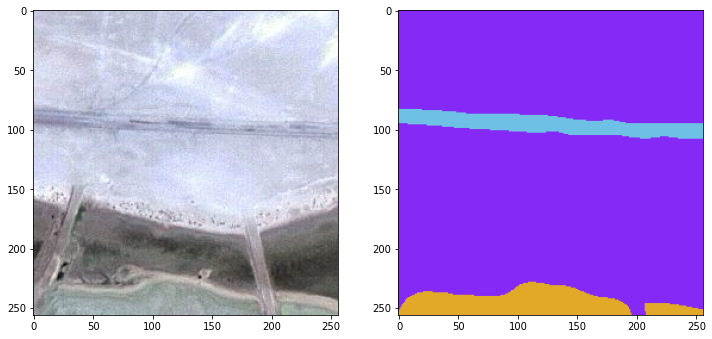

60
Unique labels in label dataset are:  [0 1 2 3 4 5]


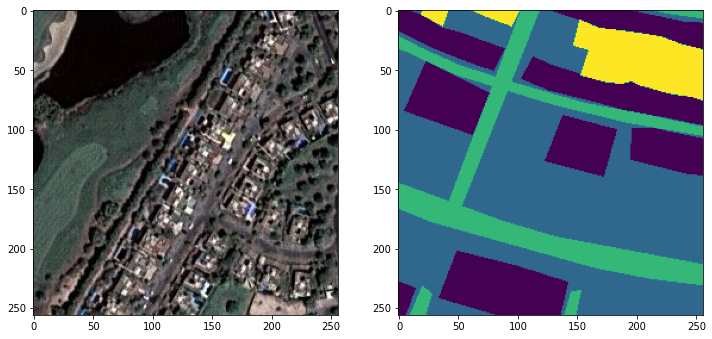

In [ ]:
import os
import cv2
import numpy as np

from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

root_directory = 'Semantic segmentation dataset/'

patch_size = 256

#Read images from repsective 'images' subdirectory
#As all images are of ddifferent size we have 2 options, either resize or crop
#But, some images are too large and some small. Resizing will change the size of real objects.
#Therefore, we will crop them to a nearest size divisible by 256 and then 
#divide all images into patches of 256x256x3. 
image_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   #Find all 'images' directories
        images = os.listdir(path)  #List of all image names in this subdirectory
        for i, image_name in enumerate(images):  
            if image_name.endswith(".jpg"):   #Only read jpg images...
               
                image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR
                SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                image = np.array(image)             
       
                #Extract patches from each image
                print("Now patchifying image:", path+"/"+image_name)
                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,:,:]
                        
                        #Use minmaxscaler instead of just dividing by 255. 
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. 
                        single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.                               
                        image_dataset.append(single_patch_img)
                
  
                
  
#Now do the same as above for masks
#For this specific dataset we could have added masks to the above code as masks have extension png
mask_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks':   #Find all 'images' directories
        masks = os.listdir(path)  #List of all image names in this subdirectory
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):   #Only read png images... (masks in this dataset)
               
                mask = cv2.imread(path+"/"+mask_name, 1)  #Read each image as Grey (or color but remember to map each color to an integer)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                mask = np.array(mask)             
       
                #Extract patches from each image
                print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
                        single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.                               
                        mask_dataset.append(single_patch_mask) 
 
image_dataset = np.array(image_dataset)
mask_dataset =  np.array(mask_dataset)

#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()



a=int('3C', 16)  #3C with base 16. Should return 60. 
print(a)
#Do the same for all RGB channels in each hex code to convert to RGB
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155

label = single_patch_mask

# Now replace RGB to integer values to be used as labels.
#Find pixels with combination of RGB for the above defined arrays...
#if matches then replace all values in that pixel with a specific integer
def rgb_to_2D_label(label):
    """
    Suply our labale masks as input in RGB format. 
    Replace pixels with specific RGB values ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5
    
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels
    
    return label_seg

labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label)    

labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)
 

print("Unique labels in label dataset are: ", np.unique(labels))

#Another Sanity check, view few mages
import random
import numpy as np

image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()

In [ ]:
n_classes = len(np.unique(labels))
from keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=n_classes)

#split to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)


#Training/Validation Loss and IoU graphs

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

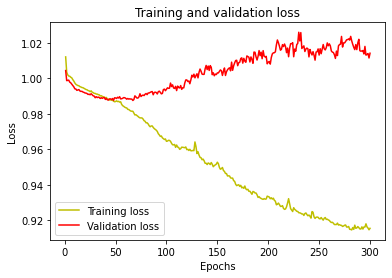

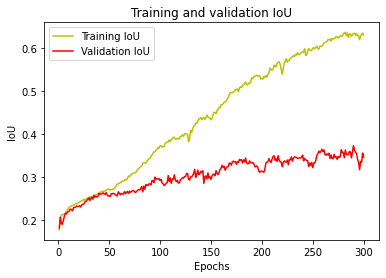

In [ ]:
#######################################
#Parameters for model
# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss
# from sklearn.utils.class_weight import compute_class_weight

# weights = compute_class_weight('balanced', np.unique(np.ravel(labels,order='C')), 
#                               np.ravel(labels,order='C'))
# print(weights)

weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights=weights) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)  #


IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3] 

metrics=['accuracy', jacard_coef]

def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model()
model.compile(optimizer='adam', loss=total_loss, metrics=metrics)
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
model.summary()


history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1,
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

#model.save('models/satellite_standard_unet_100epochs_7May2021.hdf5')
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

# preprocess input
X_train_prepr = preprocess_input(X_train)
X_test_prepr = preprocess_input(X_test)

# define model
model_resnet_backbone = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

# compile keras model with defined optimozer, loss and metrics
#model_resnet_backbone.compile(optimizer='adam', loss=focal_loss, metrics=metrics)
model_resnet_backbone.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

print(model_resnet_backbone.summary())

history2=model_resnet_backbone.fit(X_train_prepr, 
          y_train,
          batch_size=16, 
          epochs=100,
          verbose=1,
          validation_data=(X_test_prepr, y_test))


#Minmaxscaler
#With weights...[0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]   in Dice loss
#With focal loss only, after 100 epochs val jacard is:               
#With dice + 5 focal, after 100 epochs val jacard is: 0.73 (reached 0.71 in 40 epochs. So faster training but not better result. )
##With dice + 1 focal, after 100 epochs val jacard is:   
    ##Using categorical crossentropy as loss: 0.755 (100 epochs)
#With calc. weights supplied to model.fit: 
###########################################################
#plot the training and validation accuracy and loss at each epoch
history = history1
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['jacard_coef']
val_acc = history.history['val_jacard_coef']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

9/9 [==============================] - 3s 83ms/step
Mean IoU = 0.22709505
1/1 [==============================] - 0s 482ms/step


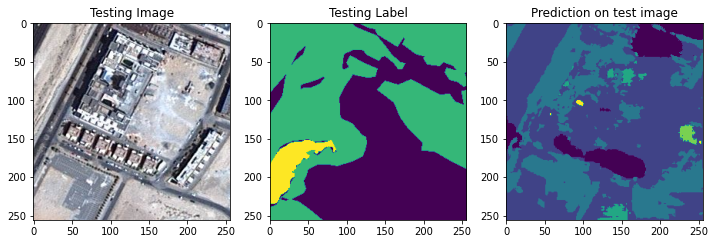

1/1 [==============================] - 0s 26ms/step


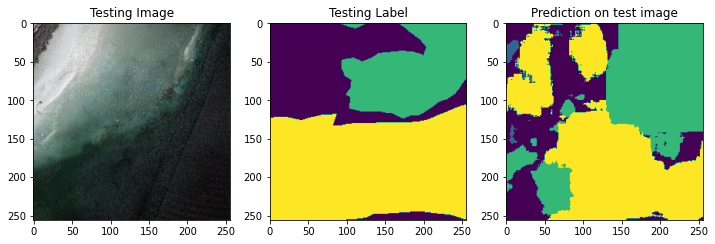

1/1 [==============================] - 0s 25ms/step


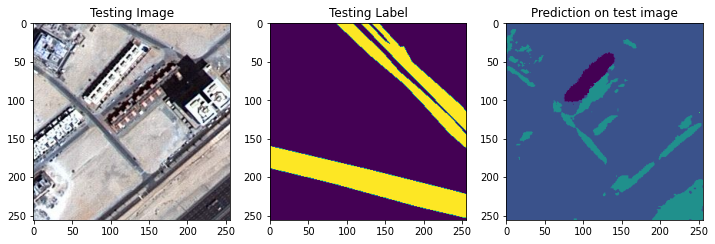

1/1 [==============================] - 0s 30ms/step


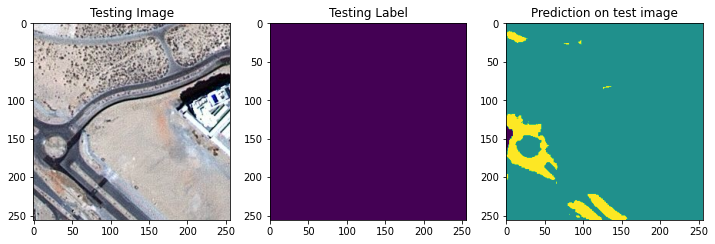

1/1 [==============================] - 0s 26ms/step


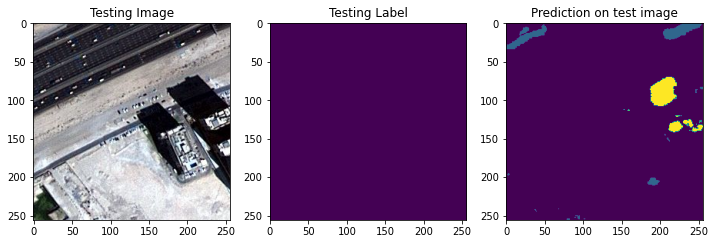

1/1 [==============================] - 0s 33ms/step


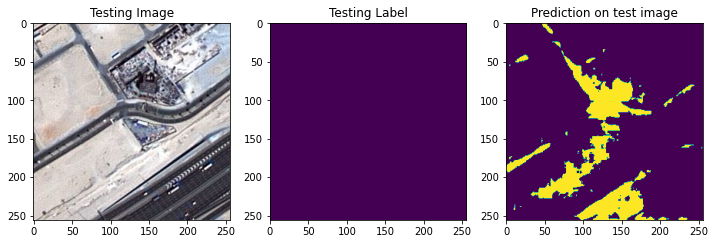

1/1 [==============================] - 0s 26ms/step


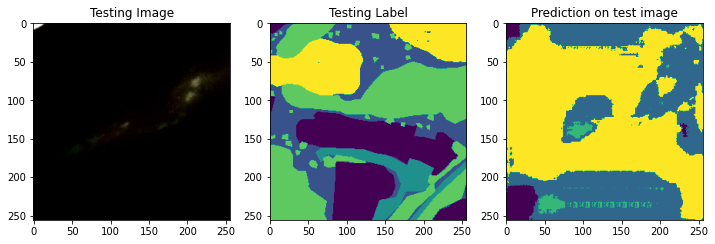

1/1 [==============================] - 0s 29ms/step


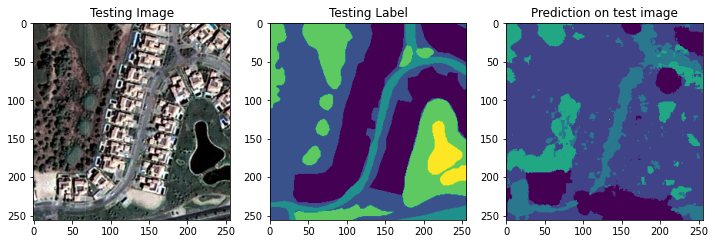

1/1 [==============================] - 0s 27ms/step


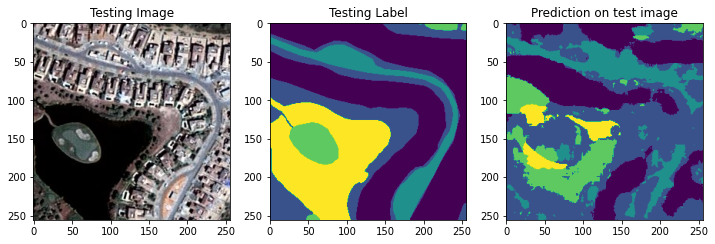

1/1 [==============================] - 0s 29ms/step


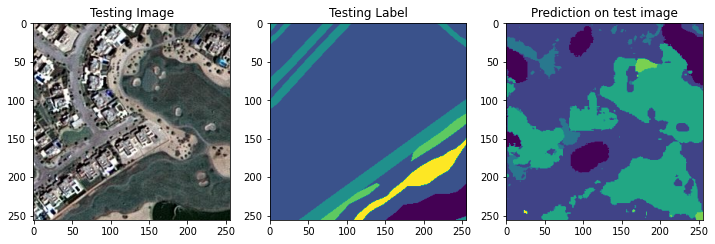

In [ ]:
from keras.models import load_model
#model = load_model("models/satellite_standard_unet_100epochs.hdf5",
#                   custom_objects={'dice_loss_plus_2focal_loss': total_loss,
#                                   'jacard_coef':jacard_coef})

#IOU
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)

#Using built in keras function for IoU
from keras.metrics import MeanIoU
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

#loop to get 10 image sets with predictions
import random
for i in range(10):
  test_img_number = random.randint(0, len(X_test))
  test_img = X_test[test_img_number]
  ground_truth=y_test_argmax[test_img_number]
  #test_img_norm=test_img[:,:,0][:,:,None]
  test_img_input=np.expand_dims(test_img, 0)
  prediction = (model.predict(test_img_input))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]


  plt.figure(figsize=(12, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img)
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth)
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(predicted_img)
  plt.show()

#Precision Recall Curves

In [ ]:
from keras.callbacks import TensorBoard
from tensorboard.plugins.pr_curve import summary as pr_summary
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc


class PRTensorBoard(TensorBoard):
    def __init__(self, *args, **kwargs):
        self.pr_curve = kwargs.pop('pr_curve', True)
        super(PRTensorBoard, self).__init__(*args, **kwargs)

        global tf
        import tensorflow as tf

    def set_model(self, model):
        super(PRTensorBoard, self).set_model(model)

        if self.pr_curve:
            # Get the prediction and label tensor placeholders.
            predictions = self.model._feed_outputs[0]
            labels = tf.cast(self.model._feed_targets[0], tf.bool)
            # Create the PR summary OP.
            self.pr_summary = pr_summary.op(tag='pr_curve',
                                            predictions=predictions,
                                            labels=labels,
                                            display_name='Precision-Recall Curve')

    def on_epoch_end(self, epoch, logs=None):
        super(PRTensorBoard, self).on_epoch_end(epoch, logs)

        if self.pr_curve and self.validation_data:
            # Get the tensors again.
            tensors = self.model._feed_targets + self.model._feed_outputs
            # Predict the output.
            predictions = self.model.predict(self.validation_data[:-2])
            # Build the dictionary mapping the tensor to the data.
            val_data = [self.validation_data[-2], predictions]
            feed_dict = dict(zip(tensors, val_data))
            # Run and add summary.
            result = self.sess.run([self.pr_summary], feed_dict=feed_dict)
            self.writer.add_summary(result[0], epoch)
        self.writer.flush()

In [ ]:
#trying to plot prec and recall curves
#keras.metrics.Recall(...) and keras.metrics.Precision(...)
!pip install torchvision 
import torch
import torchvision
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve
'''
preds  = torch.tensor([2, 0, 2, 1])
target = torch.tensor([1, 1, 2, 0])
precision_recall(preds, target, average='macro', num_classes=3)
precision_recall(preds, target, average='micro')'''


y_pred = model.predict_proba(X)

index = 2
label = model.classes_[index]
p, r, t = precision_recall_curve(y_true, y_pred[:, index], pos_label=label)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


IndexError: ignored

In [ ]:
'''plot_precision_recall_curve( X_test, y_test)
plt.plot([0,1], [0.2035,0.2035], c='k')
plt.legend(loc='best')'''

NameError: ignored